$$ \mathbf{v}_t \leftarrow \beta_1\mathbf{v}_{t-1} + (1-\beta_1)\mathbf{g}_t $$

$$ \mathbf{s}_t \leftarrow \beta_2\mathbf{s}_{t-1} + (1-\beta_2)\mathbf{g}_t \odot \mathbf{g}_t $$

$$ \hat{\mathbf{v}}_t \leftarrow \frac{\mathbf{v}_t}{1-\beta^t_1} $$

$$ \hat{\mathbf{s}}_t \leftarrow \frac{\mathbf{s}_t}{1-\beta^t_2} $$

$$ \mathbf{g}_t' \leftarrow \frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon} $$

$$ \mathbf{x}_t \leftarrow  $$

In [1]:
%matplotlib inline
import MyD2l as d2l
import torch

In [2]:
features, labels = d2l.get_data_ch7()

def init_adam_states():
    v_w, v_b = torch.zeros(features.shape[1], 1), torch.zeros(1)
    s_w, s_b = torch.zeros(features.shape[1], 1), torch.zeros(1)
    return (v_w, s_w), (v_b, s_b)

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad
        s[:] = beta2 * s + (1 - beta2) * p.grad ** 2
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (s_bias_corr.sqrt() + eps)
        p.grad.zero_()
    hyperparams['t'] += 1

loss: 0.242646, 0.890615 sec per epoch


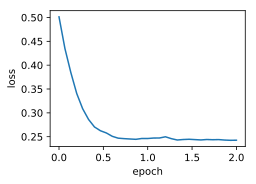

In [3]:
d2l.train_ch7(adam, init_adam_states(), {'lr': 0.01, 't': 1}, features, labels)

loss: 0.505732, 0.860697 sec per epoch


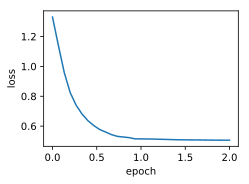

In [9]:
d2l.train_nn_ch7(torch.optim.Adam, (0.01, ), features, labels)

loss: 0.489722, 1.300116 sec per epoch


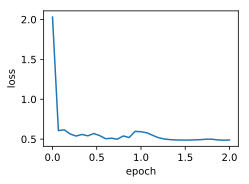

In [11]:
d2l.train_nn_ch7(torch.optim.Adam, (0.1, ), features, labels)
